<a href="https://colab.research.google.com/github/LeaslyG/100-pandas-puzzles/blob/master/07MIAR_Proyecto_Programacion_Vegetable_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

# Carga de datos desde la plataforma Kaggle

In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=c9caba77c07becb445aa76d56369059ec9c3cc4a514457504b23dfc216fb1d6e
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

# Si no funciona subimos manualmente el archivo kaggle.json al repositorio

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
100% 533M/534M [00:18<00:00, 32.0MB/s]
100% 534M/534M [00:18<00:00, 29.7MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip -q /content/vegetable-image-dataset.zip -d my_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls 'my_dataset'

'Vegetable Images'


El conjunto de datos se ha cargado en el repositorio de Google Collab dentro de my_dataset/Vegetable Images.  
Dentro contiene una estructura de carpetas con test, train y validation que usaremos para las cada fase de construcción de los modelos. Cada una de estas carpetas contiene a su vez 15 carpetas, una para cada clase del dataset y, finalmente, cada una de las 15 carpetas contiene las imágenes a utilizar en formato .jpg

# Inspección del conjunto de datos

In [ ]:
# Creamos un DataGenerator para cargar los datos desde las carpetas
from os import path
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos las rutas donde se encuentran las imagenes de cada subconjunto
train_path = path.join('my_dataset', 'Vegetable Images', 'train')
val_path = path.join('my_dataset', 'Vegetable Images', 'validation')
test_path = path.join('my_dataset', 'Vegetable Images', 'test')

# Cremos un ImageDataGenerator para usar el método flow_from_directory
# para cargar los datos de train. De momento no aplicamos Image Augmentation
datagen_train = ImageDataGenerator(rescale=1./255.)
                                  #  rotation_range=15,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  zoom_range=0.2)

# Definimos las etiquetas de los datos
LabelNames = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
              'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
              'Papaya', 'Potato', 'Pumkin', 'Radish', 'Tomato']

# Llamamos al datagen y mostramos el tamaño de los datos
sample = 23
i = 0
for images, labels in datagen_train.flow_from_directory(
    train_path, target_size=(224,224), shuffle=True, seed=42):
  print('EXPLORACIÓN DE LAS DIMENSIONES DE LOS DATOS PARA 1 BATCH:')
  print('32 imagenes por batch de 224x224x3 canales:')
  print(images.shape)
  print('-----------------------')
  print('32 etiquetas de longitud 15 cada 1 (OHE):')
  print(labels.shape)
  print('-----------------------')
  print('1 pixel (3 canales), comprobamos la normalización:')
  print(images[0][0][0])
  print('-----------------------')
  print('One-hot-encoding para las 15 etiquetas:')
  print([labels[0]])
  break

Found 15000 images belonging to 15 classes.
EXPLORACIÓN DE LAS DIMENSIONES DE LOS DATOS PARA 1 BATCH:
32 imagenes por batch de 224x224x3 canales:
(32, 224, 224, 3)
-----------------------
32 etiquetas de longitud 15 cada 1 (OHE):
(32, 15)
-----------------------
1 pixel (3 canales), comprobamos la normalización:
[0.70980394 0.82745105 0.9607844 ]
-----------------------
One-hot-encoding para las 15 etiquetas:
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)]


Found 15000 images belonging to 15 classes.
Label = Cauliflower


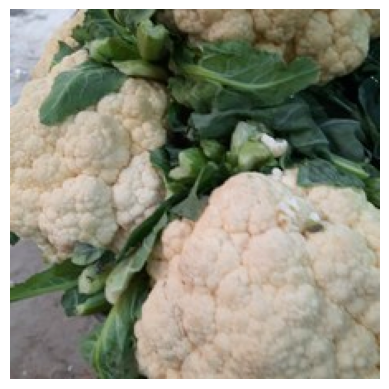

Label = Bottle_Gourd


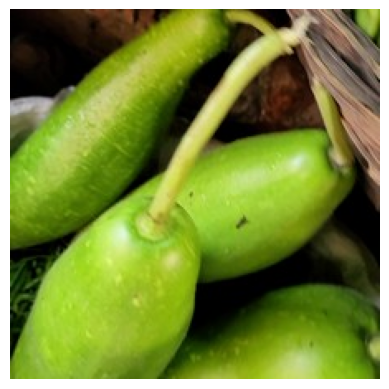

Label = Broccoli


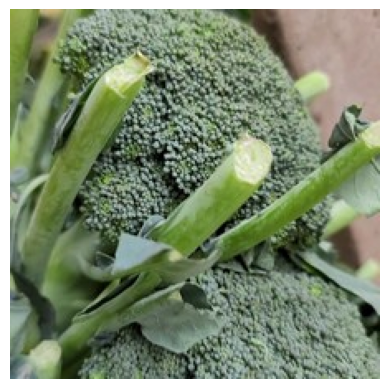

In [ ]:
# Recorremos el datagen para sacar imágenes y mostrarlas por pantalla
sample = 23
i = 0
for images, labels in datagen_train.flow_from_directory(
    train_path, target_size=(224,224), shuffle=True, seed=42):
  print(f"Label = {LabelNames[labels[sample].argmax(axis=0)]}")
  plt.imshow(image.array_to_img(images[sample]))
  plt.axis('off')
  plt.show()
  i += 1
  if i == 3:
    break

# Desarrollo de la arquitectura de red neuronal desde cero

Para construir una arquitectura de red neuronal desde cero para el conjunto de datos que se va a cargar, primero necesitamos entender la naturaleza de los datos y la tarea que se va a realizar. Una vez que tengamos una comprensión clara de estos aspectos, podemos diseñar una arquitectura que sea adecuada para el problema en cuestión. Esto implica determinar el número y tipo de capas, así como las funciones de activación, la función de pérdida y el optimizador adecuados.

En el apartado anterior ya hemos definido las rutas donde se encuentran las imagenes y lo labels.

### Generadores de datos de imágenes utilizando ImageDataGenerator de Keras

Para el preprocesamiento de datos y el aumento de datos en conjuntos de entrenamiento, validación y prueba. Esto es esencial para alimentar eficazmente una red neuronal convolucional (CNN) con imágenes.
Los generadores de flujo de datos que creamos proporcionan lotes de imágenes procesadas y aumentadas de forma dinámica a la red neuronal durante el entrenamiento

In [ ]:
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Valores fijos
random_seed = 42

# Configurar generadores de datos para cada conjunto
datagen_train_sc = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)
datagen_val_sc = ImageDataGenerator(rescale=1./255)
datagen_test_sc = ImageDataGenerator(rescale=1./255)

# Flujo de datos de entrenamiento
train_generator_sc = datagen_train_sc.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        seed=random_seed
)

# Flujo de datos de validación
validation_generator_sc = datagen_val_sc.flow_from_directory(
        val_path,
        target_size=(150, 150),
        batch_size=32,
        shuffle=False,
        seed=random_seed
)

# Flujo de datos de prueba
test_generator_sc = datagen_test_sc.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=32,
        shuffle=False,
        seed=random_seed
)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### Extracción de datos

Utilizando el método *next()* de los generadores de flujo de datos nos devuelve un lote de datos junto con sus etiquetas correspondientes. Ahora tenemos los datos preparados y listos para ser utilizados para entrenar y evaluar tu modelo de red neuronal convolucional.

In [ ]:
# Obtener los conjuntos de datos de entrenamiento
x_train_sc, y_train_sc = train_generator_sc.next()

# Obtener los conjuntos de datos de validación
x_val_sc, y_val_sc = validation_generator_sc.next()

# Obtener los conjuntos de datos de prueba
x_test_sc, y_test_sc = test_generator_sc.next()

### Cargamos las librerias de Keras y tensorflow

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

### Arquitectura de red convolucional

#### Base Model

Consta de dos bloques principales donde estos bloques forman la base del modelo CNN, que luego se conectará a capas densas para la clasificación final. La función de regularización L2 se utiliza en las capas de convolución para mitigar el sobreajuste y mejorar la generalización del modelo. Además,utilizamos el optimizador Adam con una tasa de aprendizaje de 0.001 y un conjunto de callbacks para detener el entrenamiento tempranamente si no se observa mejoría en la pérdida de validación durante un número determinado de épocas.

#### Top Model

En la parte superior del modelo utilizamos GAP para reducir la dimensionalidad de las características extraídas y obtener una representación compacta de las mismas. El optimizador Adam con la tasa de aprendizaje especificada y la función de pérdida de entropía cruzada categórica, adecuada para problemas de clasificación con múltiples clases.

In [ ]:
# Arquitectura de red

# Definicion de hiperparametros
batch_size = 256
learning_rate = 0.001
epochs=30
num_clases=15

# Callbacks para early stopping
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Definimos layer de entreda
input = layers.Input(shape=(x_train_sc.shape[1], x_train_sc.shape[2], x_train_sc.shape[3]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.001))(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.001))(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
x1 = layers.Dropout(0.2)(x1)  # Añadir dropout

# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.001))(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.001))(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)
x2 = layers.Dropout(0.2)(x2)  # Añadir dropout

# # Bloque 3 - SOBREAJUSTE
## Con un tercer bloque nos aparecia un sobreajuste bastante destacado.

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x2)
predictions = layers.Dense(num_clases, activation="softmax")(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

# Compilamos el modelo
convnet.compile(optimizer=Adam(learning_rate=learning_rate),
                loss="categorical_crossentropy",
                metrics=["accuracy"])



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_5 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 32)        0   

Se ha entrenado el modelo utilizando los conjuntos de datos de entrenamiento y validación que durante el entrenamiento, hemos especificado el tamaño del lote (batch_size), el número de épocas (epochs), y proporcionado los datos de validación para monitorear el rendimiento del modelo en un conjunto de datos no visto.
También utilizamos callback de Early Stopping para detener el entrenamiento si no se observa una mejora en la pérdida de validación después de un número específico de épocas.

### Entrenamiento del modelo



En la llamada de la función fit utilizamos directamente los generadores de flujo de datos train_generator_sc y validation_generator_sc en lugar de los conjuntos de datos preprocesados ya que nos han dado mejor rendimiento del modelo.
Esto ayuda a trabajar con conjuntos grandes de datos y también ayuda a mejorar el rendimiento general del modelo mediante el aumento de datos y la generación de lotes de entrenamiento de manera eficiente.

In [ ]:
# Entrenamos el modelo
H = convnet.fit(train_generator_sc,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=validation_generator_sc,
                callbacks=[callback])



Epoch 1/30
469/469 [==============================] - 143s 284ms/step - loss: 1.2315 - accuracy: 0.6844 - val_loss: 2.2209 - val_accuracy: 0.4107
Epoch 2/30
469/469 [==============================] - 126s 268ms/step - loss: 0.7136 - accuracy: 0.8379 - val_loss: 1.0536 - val_accuracy: 0.6930
Epoch 3/30
469/469 [==============================] - 124s 263ms/step - loss: 0.5317 - accuracy: 0.8863 - val_loss: 0.7985 - val_accuracy: 0.8053
Epoch 4/30
469/469 [==============================] - 118s 251ms/step - loss: 0.4186 - accuracy: 0.9203 - val_loss: 1.1608 - val_accuracy: 0.6840
Epoch 5/30
469/469 [==============================] - 117s 248ms/step - loss: 0.3545 - accuracy: 0.9355 - val_loss: 0.7711 - val_accuracy: 0.7807
Epoch 6/30
469/469 [==============================] - 116s 246ms/step - loss: 0.3161 - accuracy: 0.9439 - val_loss: 0.8087 - val_accuracy: 0.7920
Epoch 7/30
469/469 [==============================] - 117s 249ms/step - loss: 0.2873 - accuracy: 0.9539 - val_loss: 0.9439 -

En los resultados vemos que la pérdida en el conjunto de entrenamiento disminuye gradualmente con cada época, lo que indica que el modelo está aprendiendo de manera efectiva. Además, la precisión del modelo en el conjunto de entrenamiento también aumenta con el tiempo, lo que indica que el modelo está mejorando en la clasificación de las imágenes.

Con respecto al conjunto de validación observamos una disminución en la pérdida y un aumento en la precisión durante las primeras épocas, indicandonos una mejora en el rendimiento del modelo. Sin embargo, después de la época 10, la pérdida en el conjunto de validación comienza a aumentar, lo que se puede deber a un posible sobreajuste. Esto lleva a activar el callback deteniendolo en la época 15.

En conclusión, podriamos decir que el modelo parece estar aprendiendo correctamente de los datos de entrenamiento y generalizando bien a los datos de validación, aunque se observa una ligera tendencia al sobreajuste hacia el final del entrenamiento.



#### Funciones

In [ ]:
# Funciones base
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(mod, test_datagen, batch_size):
  print("[INFO]: Evaluando red neuronal...")
  predictions = mod.predict(test_datagen, batch_size=batch_size)
  print(classification_report(test_datagen.classes, predictions.argmax(axis=1)))

### Visualización del entrenamiento

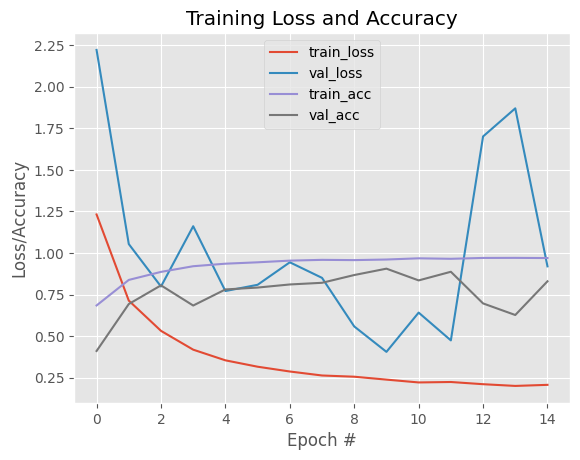

In [ ]:
# Learning curves
visualize_learning_curve(H)


### Evalución del metodo

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, test_generator_sc, batch_size)

[INFO]: Evaluando red neuronal...
94/94 [==============================] - 4s 42ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       200
           1       0.99      0.66      0.79       200
           2       0.90      0.99      0.95       200
           3       0.85      0.98      0.91       200
           4       0.56      1.00      0.72       200
           5       0.97      0.57      0.72       200
           6       0.99      0.96      0.97       200
           7       0.99      0.99      0.99       200
           8       0.94      0.92      0.93       200
           9       0.96      0.93      0.94       200
          10       0.99      0.96      0.98       200
          11       0.99      0.88      0.93       200
          12       0.98      0.88      0.92       200
          13       0.86      1.00      0.92       200
          14       0.98      0.92      0.95       200

    accuracy                           0.90   


Los resultados de evaluación muestran un buen rendimiento del modelo en el conjunto de datos de prueba. La precisión global del modelo es del 90%, lo que indica que está clasificando correctamente la mayoría de las imágenes de prueba. Además al observar las métricas de precisión, recall y f1-score para cada clase podemos ver que el modelo tiene un buen desempeño en la mayoría de las clases.

Por lo general, este modelo parece generalizar bien a datos y muestra una capacidad sólida para clasificar imágenes en múltiples clases.


# Desarrollo de la arquitectura de red neuronal con una red pre-entrenada

## Transfer learning ResNet50V2

A continuación realizamos transfer-learning y fine-tunning con una red preentrenada con el dataset Imagenet. Primero hacemos un experimento con la red Resnet50V2 cargada en Keras: https://keras.io/api/applications/resnet/#resnet50v2-function  
Artículo original: Identity Mappings in Deep Residual Networks (CVPR 2016)
(https://arxiv.org/abs/1603.05027)


### Definición del modelo

In [ ]:
from keras.applications import ResNet50V2
from keras.models import Sequential
from keras import layers

# Cargamos el base model directamente de Keras.applications
base_model_RN_tl = ResNet50V2(include_top=False,
                        weights='imagenet',
                        input_shape=(224,224,3))

# Dejamos el base model completo sin reentrenar (transfer learning)
base_model_RN_tl.trainable = False

# Inicialiazamos el modelo y añadimos el base model
Resnet50_tl = Sequential()
Resnet50_tl.add(base_model_RN_tl)

# Añadimos el top model
Resnet50_tl.add(layers.GlobalAveragePooling2D())
Resnet50_tl.add(layers.Dense(15, activation='softmax'))

# Mostramos el modelo resultante
# Con la capa de GlobalAveragePooling conseguimos un modelo sencillo
# con pocos parámetros a entrenar -> entrenamiento "rápido"
print(Resnet50_tl.summary())

94668760/94668760 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 15)                30735     
                                                                 
Total params: 23595535 (90.01 MB)
Trainable params: 30735 (120.06 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________
None


### Definición de Data Generators para para Data Augmentation
Usamos Data Augmentation durante el entrenamiento para evitar overfitting

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Volvemos a definir el Data Generator de training esta vez con augmentations
datagen_train = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

### Definición de Callbacks para el modelo

Dado que el proceso de entrenamiento con imágenes de 224x224x3 y data augmentation es lento definimos un callback de EarlyStopping para hacer un uso eficiente del tiempo de entrenamiento

In [ ]:
from keras.callbacks import EarlyStopping

ES_callback = EarlyStopping(monitor='val_loss', patience=3,
                         restore_best_weights=True, verbose=1)

### Entrenamiento del modelo

In [ ]:
from keras.optimizers import Adam

# Definición de hiperparámetros
learning_rate = 0.001
batch_size = 32
epochs = 20
random_seed = 42

# Compilamos el modelo
Resnet50_tl.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Definimos el Data Generator para los datos de validación
datagen_val = ImageDataGenerator(rescale=1./255.)

#  Entrenamos el modelo
H = Resnet50_tl.fit(datagen_train.flow_from_directory(
     train_path, target_size=(224,224), shuffle=True, seed=random_seed,
     batch_size = batch_size),
                     epochs=epochs,
                     validation_data=datagen_val.flow_from_directory(
     val_path, target_size=(224,224), shuffle=False, seed=random_seed,
     batch_size=batch_size),
                     callbacks=[ES_callback])

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/20
469/469 [==============================] - 228s 468ms/step - loss: 0.2286 - accuracy: 0.9408 - val_loss: 0.0306 - val_accuracy: 0.9957
Epoch 2/20
469/469 [==============================] - 205s 437ms/step - loss: 0.0415 - accuracy: 0.9905 - val_loss: 0.0173 - val_accuracy: 0.9970
Epoch 3/20
469/469 [==============================] - 199s 424ms/step - loss: 0.0252 - accuracy: 0.9939 - val_loss: 0.0101 - val_accuracy: 0.9973
Epoch 4/20
469/469 [==============================] - 208s 443ms/step - loss: 0.0200 - accuracy: 0.9953 - val_loss: 0.0107 - val_accuracy: 0.9983
Epoch 5/20
469/469 [==============================] - 206s 439ms/step - loss: 0.0179 - accuracy: 0.9952 - val_loss: 0.0123 - val_accuracy: 0.9973
Epoch 6/20
469/469 [==============================] - 200s 426ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0079 - val_accuracy: 0.9983
Epoch 7/20
469/469 [=================

### (Opcional) Guardamos el modelo

In [ ]:
# Guardamos el modelo para no tener que volver a entrenarlo en sesiones posteriores
Resnet50_tl.save('Resnet50_tl.f5')

# Lo comprimimos y lo descargamos a nuestra máquina local
from google.colab import files
!zip -r /content/Resnet50_tl.f5.zip /content/Resnet50_tl.f5
files.download('Resnet50_tl.f5.zip')

  adding: content/Resnet50_tl.f5/ (stored 0%)
  adding: content/Resnet50_tl.f5/variables/ (stored 0%)
  adding: content/Resnet50_tl.f5/variables/variables.index (deflated 77%)
  adding: content/Resnet50_tl.f5/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/Resnet50_tl.f5/fingerprint.pb (stored 0%)
  adding: content/Resnet50_tl.f5/assets/ (stored 0%)
  adding: content/Resnet50_tl.f5/saved_model.pb (deflated 91%)
  adding: content/Resnet50_tl.f5/keras_metadata.pb (deflated 96%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### (Opcional) Cargamos un modelo previamente guardado

In [ ]:
# Cargamos el modelo en Collab manualmente

# Descomprimimos el modelo cargado en un .zip
!unzip -q /content/Resnet50_tl.f5.zip -d Resnet50_tl.f5

In [ ]:
# Si es necesario cargamos un modelo guardado anteriormente en la raíz de carpetas
from keras.saving import load_model

# Cargamos el modelo en una variable
Resnet50_tl = load_model('Resnet50_tl.f5/content/Resnet50_tl.f5')
Resnet50_tl.summary()

### Monitorización del proceso de entrenamiento

In [ ]:
# Función para visualizar el proceso de entrenamiento
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

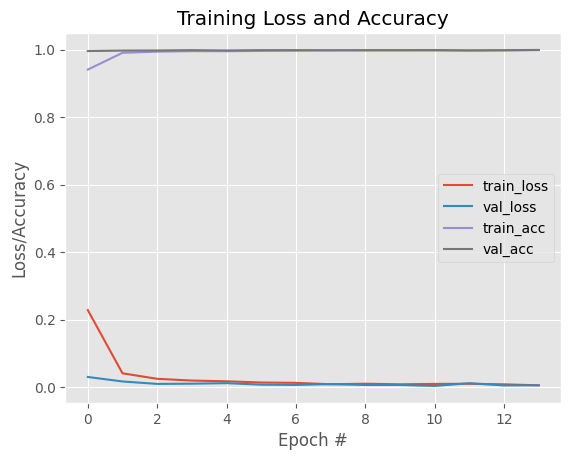

In [ ]:
# Visualizamos el proceso de entrenamiento con la función definida
visualize_learning_curve(H)

### Evaluación del modelo predictivo

In [ ]:
# Función para evaluar la precisión del modelo con los datos de test
from sklearn.metrics import classification_report

def evaluate_model(model, test_datagen_flow, batch_size):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(test_datagen_flow, batch_size=batch_size)
  print(classification_report(test_datagen_flow.classes, predictions.argmax(axis=1)))

In [ ]:
# Definición de parámetros para la evaluación
batch_size = 64
random_seed = 42


# Definimos el Data Generator para los datos de test
datagen_test = ImageDataGenerator(rescale=1./255.)
datagen_test_flow = datagen_test.flow_from_directory(
    test_path, target_size=(224,224), shuffle=False, seed=random_seed,
    batch_size=batch_size)

# Usamos la función predefinida anteriormente para evaluar el modelo
evaluate_model(Resnet50_tl, datagen_test_flow, batch_size)

Found 3000 images belonging to 15 classes.
[INFO]: Evaluando red neuronal...
47/47 [==============================] - 17s 263ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.99      0.99       200
           2       1.00      1.00      1.00       200
           3       0.99      0.98      0.99       200
           4       1.00      1.00      1.00       200
           5       1.00      0.99      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       0.99      0.99      0.99       200
          10       0.98      1.00      0.99       200
          11       1.00      0.99      0.99       200
          12       1.00      1.00      1.00       200
          13       1.00      1.00      1.00       200
          14       1.00      0.99      1.00       200

 

### Resultados y conclusión
Como se puede observar en el classification report hecho con las 3.000 imágenes de test los resultados son perfectos con valores del 100%. Ésto se debe a que hemos utilizado una red moderna, RESNET50_V2, y que ha sido pre-entrenada en una gran cantidad de imágenes de tipología muy similar a las del dataset a predecir, en este caso imágen natural y con la misma resolución (224x224).  

Para esta arquitectura de red no se ha realizado fine-tunning ya que no es posible mejorar los resultados obtenidos.  

Respecto al uso de estrategias de regularización (weight regularization, dropout, batch normalization, data augmentation, etc.) en este modelo se ha utilizado data augmentation definido manualmente antes del proceso de entrenamiento. Adicionalmente el modelo base incluye BatchNormalization en su arquitectura.

## Red pre-entrenada VGG16


Cargamos las librerías de Keras y TensorFlow, así como los módulos

In [ ]:
from keras.applications import VGG19
from keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import  Dense, ReLU, Softmax, BatchNormalization,  Flatten
from tensorflow.random import set_seed
from tensorflow.keras.models import Model

Recogemos los datos de kaggle con el API personal

In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leasly","key":"57f5908d20768f07528b2a79b8c8a88f"}'}

In [ ]:
#Datasets disponibles en Kaggle
!kaggle datasets list
!pip install --upgrade --force-reinstall --no-deps kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=e7ae818c10647e0f6d2971c665e174618336df94e513fd79877a18787dfc0f5f
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16

Utilizamos para este trabajo un generador de imagenes para los datos de Train, test y validación


In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset --force

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
100% 533M/534M [00:07<00:00, 87.4MB/s]
100% 534M/534M [00:07<00:00, 72.8MB/s]


In [ ]:
#Creamos el directorio
!mkdir dataset_vegetables

In [ ]:
#Descomprimimos los datos
!unzip -q /content/vegetable-image-dataset.zip -d dataset_vegetables


In [ ]:
!ls 'dataset_vegetables'

'Vegetable Images'


In [ ]:
# Creamos un DataGenerator
from os import path
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos las rutas donde se encuentran las imagenes de cada subconjunto
train_path = path.join('dataset_vegetables', 'Vegetable Images', 'train')
val_path = path.join('dataset_vegetables', 'Vegetable Images', 'validation')
test_path = path.join('dataset_vegetables', 'Vegetable Images', 'test')

# Cremos un ImageDataGenerator para usar el método flow_from_directory
# para cargar los datos de train.
datagen_train = ImageDataGenerator(rescale=1./255.)
                                  #  rotation_range=15,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  zoom_range=0.2)

# Definimos las etiquetas
LabelNames = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
              'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
              'Papaya', 'Potato', 'Pumkin', 'Radish', 'Tomato']

# Llamamos al datagen y mostramos el tamaño de los datos
sample = 23
i = 0
for images, labels in datagen_train.flow_from_directory(
    train_path, target_size=(224,224), shuffle=True, seed=42):
  print('EXPLORACIÓN DE LAS DIMENSIONES DE LOS DATOS PARA 1 BATCH:')
  print('32 imagenes por batch de 224x224x3 canales:')
  print(images.shape)
  print('-----------------------')
  print('32 etiquetas de longitud 15 cada 1 (OHE):')
  print(labels.shape)
  print('-----------------------')
  print('1 pixel (3 canales), comprobamos la normalización:')
  print(images[0][0][0])
  print('-----------------------')
  break

Found 15000 images belonging to 15 classes.
EXPLORACIÓN DE LAS DIMENSIONES DE LOS DATOS PARA 1 BATCH:
32 imagenes por batch de 224x224x3 canales:
(32, 224, 224, 3)
-----------------------
32 etiquetas de longitud 15 cada 1 (OHE):
(32, 15)
-----------------------
1 pixel (3 canales), comprobamos la normalización:
[0.70980394 0.82745105 0.9607844 ]
-----------------------


Mostramos un ejemplo de 3 imagenes con su etiqueta en la parte superior

Found 15000 images belonging to 15 classes.
Label = Cauliflower
Label = Bottle_Gourd
Label = Broccoli


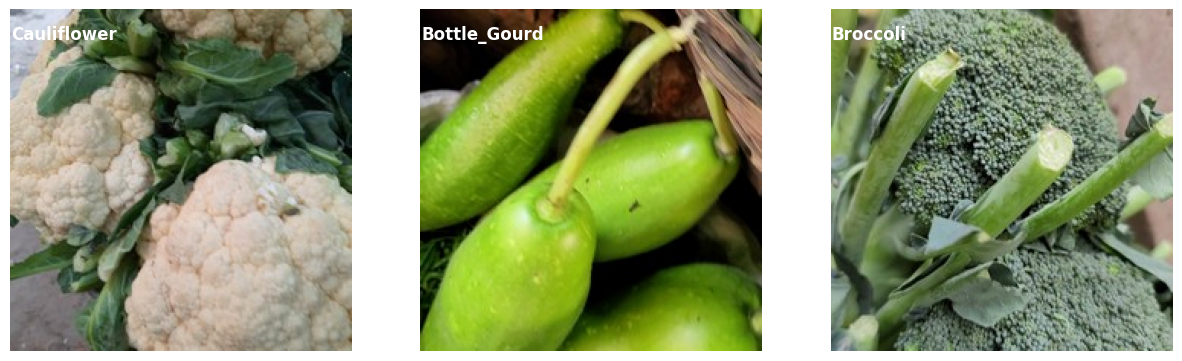

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [ ]:
sample = 23
i = 0
num_images=3
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for images, labels in datagen_train.flow_from_directory(
    train_path, target_size=(224,224), shuffle=True, seed=42):
  label_name = LabelNames[labels[sample].argmax(axis=0)]
  print(f"Label = {label_name}")


  plt.figure(figsize=(2, 2))
  axes[i].imshow(image.array_to_img(images[sample]))
  axes[i].axis('off')
  axes[i].text(0, 10, label_name, color='white', fontsize=12, weight='bold', ha='left', va='top')

  i += 1
  if i == num_images:
    break

plt.tight_layout()
plt.show()

Se utiliza un DataGenerator para los datos de entrenamiento, validación y test.
Para mejorar la capacidad del modelo para generalizar utilizamos augmentations en los datos de entrenamiento.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Data Generator de training esta vez con augmentations
datagen_train = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

# Data Generator para los datos de validación
datagen_val = ImageDataGenerator(rescale=1./255.)

# Data Generator para los datos de test
datagen_test = ImageDataGenerator(rescale=1./255.)

In [ ]:
# Definimos las rutas donde se encuentran las imagenes de cada subconjunto
train_path = path.join('dataset_vegetables', 'Vegetable Images', 'train')
val_path = path.join('dataset_vegetables', 'Vegetable Images', 'validation')
test_path = path.join('dataset_vegetables', 'Vegetable Images', 'test')

Como trabajamos con un conjunto de datos de grandes dimensiones utilizamos generador de datos en lugar de cargar todos los datos en memoria. En el caso del modelo que utilizamos requiere que las etiquetas sean enteros por lo que el class_mode que utilizamos es 'sparse', como es una representación más simple también reduce la sobrecarga de memoria.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parámetros comunes para la carga de datos
target_size = (224, 224)  # Tamaño al que se redimensionarán las imágenes
batch_size = 32  # Tamaño del lote de imágenes generadas
random_seed=42

# Generadores de datos para entrenamiento, validación y prueba
train_gen = datagen_train.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=random_seed,
    class_mode='sparse'  # Para clasificación multiclase
)

val_gen = datagen_val.flow_from_directory(
    val_path,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,
    seed=random_seed,
    class_mode='sparse'
)

test_gen = datagen_test.flow_from_directory(
    test_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Obtener los conjuntos de datos x_train, y_train, x_val, y_val, x_test y y_test
x_train, y_train = next(train_gen)

x_val, y_val = next(val_gen)
x_test, y_test = next(test_gen)

print(x_val.shape, y_val.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)


### Transfer Learning

Se carga el modelo desde Keras VGG16

In [ ]:
#Cargamos el modelo desde keras
pretrained_modelvgg= tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
#Red preentrenada VGG16
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
pretrained_model.trainable=False

#Modelo VGG16
VGG16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

Aquí observamos el resumen de la arquitectura de la red preentrenada y la del modelo VGG16 que usamos, con esto podemos comprender la estructura y complejidad del modelo.

In [ ]:
pretrained_modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 14748495 (56.26 MB)
Trainable params: 33807 (132.06 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Configuramos los aspectos específicos para el entrenamiento de nuestro modelo, aquí se puede observar que requerimos el class_mode='sparse', dado el loss= 'sparse_categorical_crossentropy' en el que es requerido.

In [ ]:
#Compilamos el modelo
VGG16_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

ES_callback=EarlyStopping(monitor='val_loss', patience=5,
                         restore_best_weights=True)

In [ ]:
# Definición de hiperparámetros
batch_size=32
epochs=20
learning_rate= 0.01

history = VGG16_model.fit(
    train_gen,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_gen,
    callbacks=[ES_callback]
)

Epoch 1/20
469/469 [==============================] - 269s 553ms/step - loss: 1.3185 - accuracy: 0.6842 - val_loss: 0.5106 - val_accuracy: 0.8820
Epoch 2/20
469/469 [==============================] - 255s 545ms/step - loss: 0.4815 - accuracy: 0.8865 - val_loss: 0.2763 - val_accuracy: 0.9343
Epoch 3/20
469/469 [==============================] - 253s 540ms/step - loss: 0.3087 - accuracy: 0.9257 - val_loss: 0.1885 - val_accuracy: 0.9580
Epoch 4/20
469/469 [==============================] - 254s 541ms/step - loss: 0.2268 - accuracy: 0.9464 - val_loss: 0.1569 - val_accuracy: 0.9583
Epoch 5/20
469/469 [==============================] - 256s 547ms/step - loss: 0.1833 - accuracy: 0.9551 - val_loss: 0.1187 - val_accuracy: 0.9700
Epoch 6/20
469/469 [==============================] - 253s 538ms/step - loss: 0.1548 - accuracy: 0.9611 - val_loss: 0.1120 - val_accuracy: 0.9703
Epoch 7/20
469/469 [==============================] - 253s 539ms/step - loss: 0.1318 - accuracy: 0.9659 - val_loss: 0.0890 -

In [ ]:
# Función para visualizar el proceso de entrenamiento
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(history):
  epochs = len(history.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

### Proceso de Entrenamiento

Observamos la curva donde el accuracy comienza en 0.6842 en la primer época y aumenta progresivamente hasta el 0.9842. A partir de la época 13 llegamos al 0.98, a nivel de ejecución por época el tiempo consumido es elevado, sin para comparar a las 20 épocas que se realizan en el ResNet50, en este sentido el accuracy es algo menor. La función de pérdida se observa su disminución progresiva desde 1.3 hasta el 0.0490

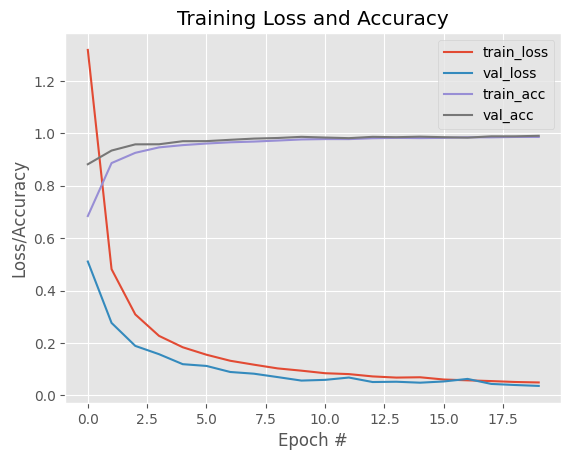

In [ ]:
# Visualizamos el proceso de entrenamiento con la función definida
visualize_learning_curve(history)

In [ ]:
# Función para evaluar la precisión del modelo con los datos de test
from sklearn.metrics import classification_report

def evaluate_model(VGG16_model, test_datagen1, batch_size):
  print("[INFO]: Evaluando red neuronal...")
  predictions = VGG16_model.predict(test_datagen_flows, batch_size=batch_size)
  print(classification_report(test_datagen_flows.classes, predictions.argmax(axis=1)))

In [ ]:
# Definición de parámetros para la evaluación
batch_size = 64
random_seed = 42


# Definimos el Data Generator para los datos de test
test_datagen1=ImageDataGenerator(rescale=1./255.)
test_datagen_flows=test_datagen1.flow_from_directory(
    test_path, target_size=(224,224), shuffle=False, seed=random_seed,
    batch_size=batch_size)

# Usamos la función predefinida anteriormente para evaluar el modelo
evaluate_model(VGG16_model, test_datagen_flows, batch_size)

Found 3000 images belonging to 15 classes.
[INFO]: Evaluando red neuronal...
47/47 [==============================] - 38s 545ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.99      0.99      0.99       200
           2       1.00      1.00      1.00       200
           3       0.99      0.96      0.98       200
           4       1.00      0.98      0.99       200
           5       0.99      0.99      0.99       200
           6       1.00      0.99      0.99       200
           7       1.00      1.00      1.00       200
           8       0.99      0.99      0.99       200
           9       0.97      0.99      0.98       200
          10       0.99      0.99      0.99       200
          11       0.99      0.99      0.99       200
          12       0.98      0.99      0.99       200
          13       0.99      0.99      0.99       200
          14       1.00      0.98      0.99       200

 

## Conclusiones

Tanto Resnet50 como VGG16 son arquitecturas
convolucionales ampliamente utilizadas, son efectivas en tareas de visión por ordenador. ResNet50 entrena redes de hasta cientos de capas y VGG es más simple y menos profunda. ResNet50 ha demostrado tener un rendimiento superior en la clasificación de imagenes lo que podemos comprobar en este trabajo.
ResNet puede requerir más recursos computacionales en comparación con VGG16 que es más rápido de entrenar.
Sin embargo en comparativa se han requerido menos épocas para aumentar el accuracy y disminuir la pérdida en el ResNet50 y en este caso donde el conjunto de datos es grande, es el ResNet el que demostró superioridad.
En cuanto a las métricas de evaluación del modelo igualmente fueron más altas en el ResNet50 que en el VGG16 alcanzando máximos rendimientos en el primero.